In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 : Read the dataset

In [4]:
import pandas as pd
df = pd.read_csv("50 startup.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Step 2 : Perform basic data quality checks


### Profit - RND,ADMIN,MKT

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### Step 3 : Seperating X(RND,ADMIN,MKT) & Y(PROFIT)

In [9]:
X = df[["RND","ADMIN","MKT"]]
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [11]:
Y = df[["PROFIT"]]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 4 : create a model 

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [13]:
model.score(X,Y)

0.9507459940683246

In [14]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [15]:
model.intercept_

array([50122.19298987])

In [17]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [19]:
coef = pd.Series(model.coef_.flatten(), dtype='object')
coef

0    0.805715
1   -0.026816
2    0.027228
dtype: object

<Axes: >

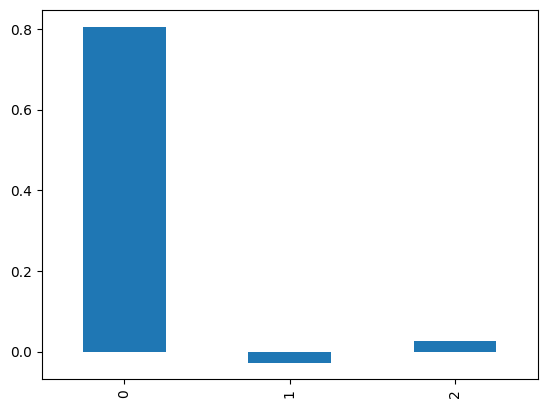

In [20]:
coef.plot(kind="bar")

### Evaluating the model

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, \
                            mean_absolute_percentage_error,r2_score

In [36]:
def evaluate_model(model,x,y):
    ypred = model.predict(x)
    mse = mean_squared_error(y,ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2 = r2_score(y,ypred)
    print(f"Mean Squared Error : {mse:.2f}")
    print(f"Root Mean Squared Error : {rmse:.2f}")
    print(f"Mean Absolute Error : {mae:.2f}")
    print(f"Mean Absolute Percentage Error : {mape:.4f}")
    print(f"R2 Score : {r2:.4f}")

In [37]:
evaluate_model(model, X, Y)

Mean Squared Error : 78417126.02
Root Mean Squared Error : 8855.34
Mean Absolute Error : 6471.45
Mean Absolute Percentage Error : 0.1060
R2 Score : 0.9507


In [39]:
ypred=model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [41]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 6: Out of sample

In [42]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [44]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [45]:
rnd = 1_20_000
admin = 30_000
mkt = 1_00_000
profit_pred = model.predict([[rnd,admin,mkt]])
print(f"RND Budget : {rnd}, ADMIN Budget : {admin}, MKT Budget : {mkt}")
print(f"Estimited Profit : {profit_pred}")

RND Budget : 120000, ADMIN Budget : 30000, MKT Budget : 100000
Estimited Profit : [[148726.32640799]]
